In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *

In [2]:
%cd drive/My Drive

/content/drive/My Drive


In [8]:
%cd complete/

/content/drive/My Drive/complete


In [9]:
!ls

dtest.zip  dtrain.zip


In [0]:
!unzip 'dtrain.zip'

In [0]:
!unzip 'dtest.zip'

In [14]:
%cd ..

/content/drive/My Drive


In [0]:
path = Path('complete/dtrain')

path_train_t2 = path/'t2'
path_train_t1 = path/'t1'

In [0]:
bs = 16
size = 128

arch = models.resnet50

In [17]:
!ls

'Colab Notebooks'   data		   pytorch-3dunet   tmodel
 complete	   'Getting started.pdf'   t1t2


In [0]:
src = ImageImageList.from_folder(path=path_train_t2).split_by_rand_pct(0.2, seed=42)

In [0]:
def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_train_t1/x.name)
           .transform(size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    return data

In [0]:
verify_images(path_t2)

In [0]:
data = get_data(bs, size)

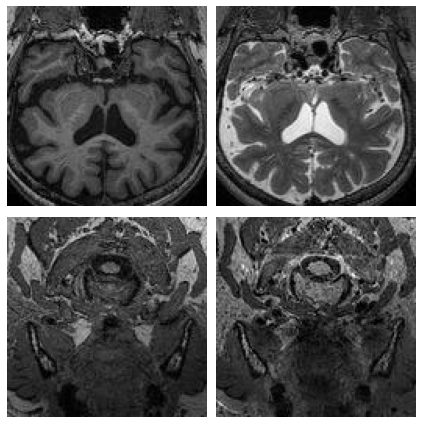

In [21]:
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(6, 6))

In [0]:
base_loss = F.l1_loss

In [0]:
wd = 1e-3
learn = unet_learner(data, arch, wd=wd, loss_func=base_loss, blur=False, norm_type=NormType.Weight)
gc.collect();

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


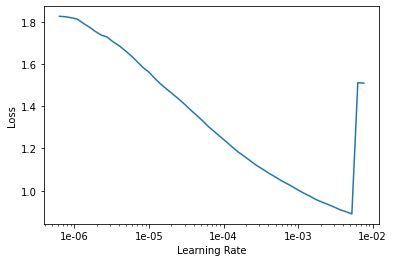

In [24]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 2e-4

In [0]:
def do_fit(save_name, lrs=slice(lr), pct_start=0.9):
    learn.fit_one_cycle(8, lrs, pct_start=pct_start)
    learn.save(save_name)
    learn.show_results(rows=3, imgsize=3)

epoch,train_loss,valid_loss,time
0,0.263987,0.267533,12:26
1,0.265839,0.269874,12:37
2,0.269805,0.272890,12:27
3,0.265257,0.277067,12:26
4,0.263085,0.280988,12:26
5,0.268663,0.270138,12:26
6,0.257368,0.269380,12:26
7,0.235663,0.261126,12:26


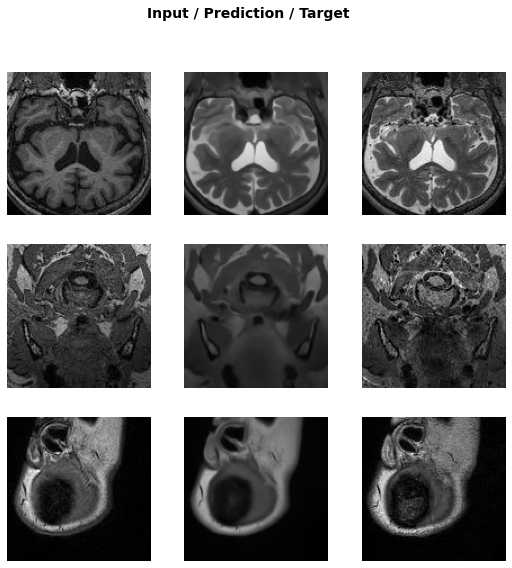

In [29]:
do_fit('t1t2-check1', slice(lr*10))

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


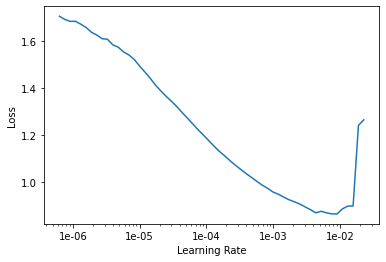

In [13]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,time
0,0.307705,0.318816,09:40
1,0.289685,0.295078,09:38
2,0.294910,0.290508,09:37
3,0.280972,0.295159,09:38
4,0.265860,0.264970,09:39


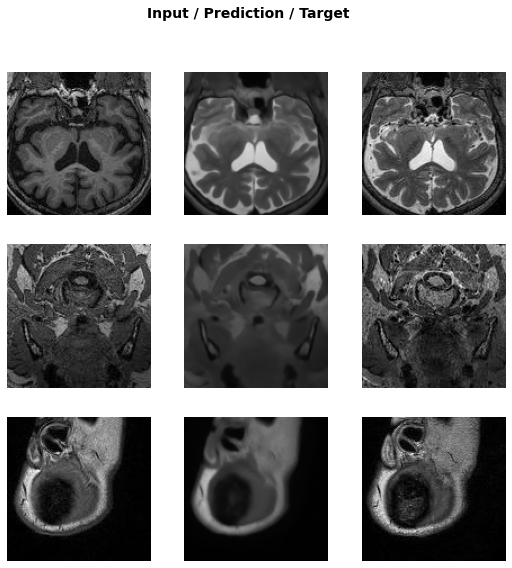

In [14]:
learn.fit_one_cycle(5, slice(2e-4, 5e-3), pct_start=0.9)
learn.save('t1t2-check2')
learn.show_results(rows=3, imgsize=3)

In [0]:
learn.save('complete-t2t1')

In [0]:
learn.export('complete-t2t1.pkl')

In [0]:
path_test = Path('t1t2/dtest')
test_t1 = path_test/'testT1'
test_t2 = path_test/'testT2'

In [0]:
data = ImageImageList.from_folder(path=test_t1)

In [0]:
data_test = (ImageImageList.from_folder(test_t1).split_none()
          .label_from_func(lambda x: test_t2/x.name)
          .transform(size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))

In [0]:
learn = unet_learner(data_test, arch, loss_func=F.l1_loss, blur=False, norm_type=NormType.Weight)

In [0]:
learn.load('/content/drive/My Drive/complete/dtrain/t2/models/complete-t2t1')

In [39]:
data_test.items[0]

PosixPath('t1t2/dtest/testT1/f7012.jpg')

In [0]:
img = open_image(data_test.items[0])

In [0]:
img.shape

In [0]:
p, q, r = learn.predict(img)

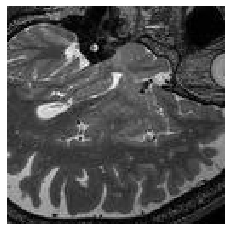

In [36]:
show_image(img, figsize=(4,4), interpolation='nearest')

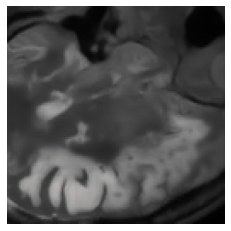

In [37]:
Image(q).show(figsize=(4,4))

/usr/local/lib/python3.6/dist-packages/fastai/vision/image.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax is None: fig,ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/fastai/vision/image.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax is None: fig,ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/fastai/vision/image.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until e

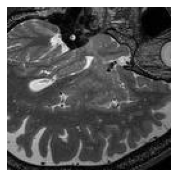

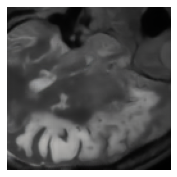

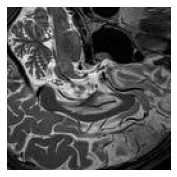

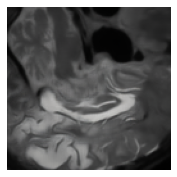

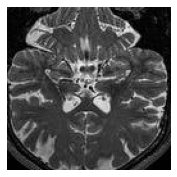

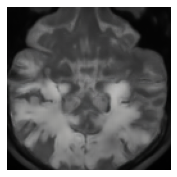

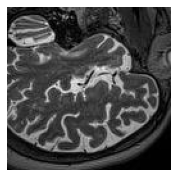

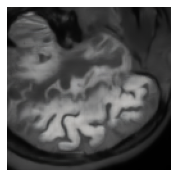

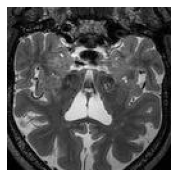

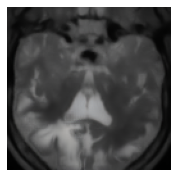

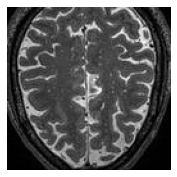

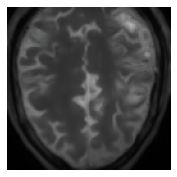

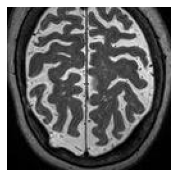

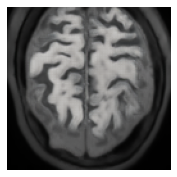

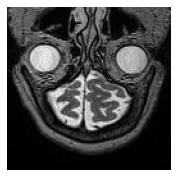

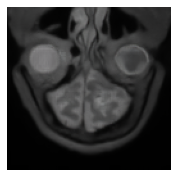

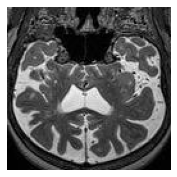

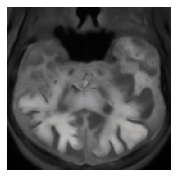

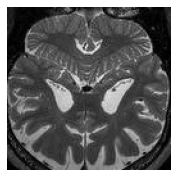

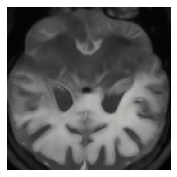

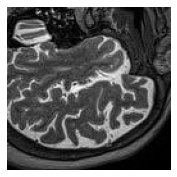

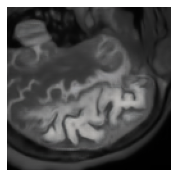

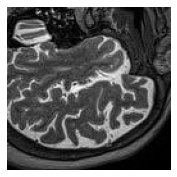

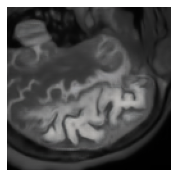

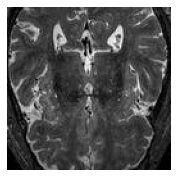

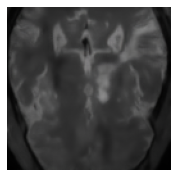

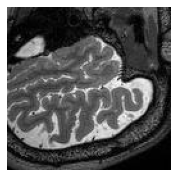

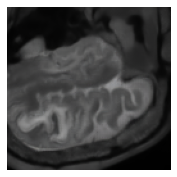

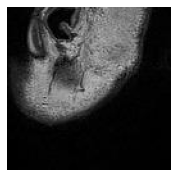

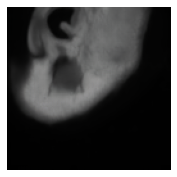

In [38]:
for image_sample in range(15):
  img = open_image(data_test.items[image_sample])
  p, q, r = learn.predict(img)
  show_image(img, figsize=(3,3))
  Image(q).show(figsize=(3,3))
